In [4]:
from scipy.io import arff
import pandas as pd
import numpy as np
import os
os.getcwd()
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, \
LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, \
f1_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

In [5]:
from os import listdir
from os.path import isfile, join
dir_files = [f for f in os.listdir(os.getcwd() + '/data') if os.path.isfile(join(os.getcwd() + '/data', f))]
dir_files

['2year.arff', '3year.arff', '5year.arff', '4year.arff', '1year.arff']

In [6]:
data_dict = {}
full_df = pd.DataFrame()

records = 0

for f in dir_files:
    temp_data = arff.loadarff(os.getcwd() + '/data/' +f)
    temp_df = pd.DataFrame(temp_data[0])
    print(temp_df.shape)
    data_dict.update({f:temp_df})
    full_df = pd.concat([full_df, temp_df])
    records += temp_df.shape[0]

print(records)

(10173, 65)
(10503, 65)
(5910, 65)
(9792, 65)
(7027, 65)
43405


In [7]:
full_df.shape

(43405, 65)

In [8]:
full_df.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,0.42695,...,0.13184,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440,b'0'
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,0.40437,...,0.12146,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381,b'0'
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,0.69841,...,0.16499,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660,b'0'
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,0.32150,...,0.29358,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066,b'0'
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,0.52167,...,0.10124,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874,b'0'


In [9]:
full_df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,7.005310e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,2.755425e+01,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,1.088350e+03,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,4.993325e+03,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,6.123700e+06,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000


In [10]:
full_df.columns.values

array(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7',
       'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14',
       'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20',
       'Attr21', 'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26',
       'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr31', 'Attr32',
       'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr38',
       'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43', 'Attr44',
       'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56',
       'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62',
       'Attr63', 'Attr64', 'class'], dtype=object)

In [11]:
for c in full_df.columns:
    print('{} is formatted as a(n) {}'.format(c, full_df[c].dtype))

Attr1 is formatted as a(n) float64
Attr2 is formatted as a(n) float64
Attr3 is formatted as a(n) float64
Attr4 is formatted as a(n) float64
Attr5 is formatted as a(n) float64
Attr6 is formatted as a(n) float64
Attr7 is formatted as a(n) float64
Attr8 is formatted as a(n) float64
Attr9 is formatted as a(n) float64
Attr10 is formatted as a(n) float64
Attr11 is formatted as a(n) float64
Attr12 is formatted as a(n) float64
Attr13 is formatted as a(n) float64
Attr14 is formatted as a(n) float64
Attr15 is formatted as a(n) float64
Attr16 is formatted as a(n) float64
Attr17 is formatted as a(n) float64
Attr18 is formatted as a(n) float64
Attr19 is formatted as a(n) float64
Attr20 is formatted as a(n) float64
Attr21 is formatted as a(n) float64
Attr22 is formatted as a(n) float64
Attr23 is formatted as a(n) float64
Attr24 is formatted as a(n) float64
Attr25 is formatted as a(n) float64
Attr26 is formatted as a(n) float64
Attr27 is formatted as a(n) float64
Attr28 is formatted as a(n) float64
A

In [12]:
full_df['class'].unique()

array([b'0', b'1'], dtype=object)

In [13]:
full_df['class'].value_counts(normalize=False)

b'0'    41314
b'1'     2091
Name: class, dtype: int64

In [14]:
full_df['class'].value_counts(normalize=True)

b'0'    0.951826
b'1'    0.048174
Name: class, dtype: float64

In [15]:
classes = []

for index, row in full_df.iterrows():
    class_val = row['class']
    if class_val not in classes:
        classes.append(class_val)

In [16]:
classes

[b'0', b'1']

In [17]:
class_dict = {}

for index, i in enumerate(classes):
    class_dict.update({i:str(index)})

class_dict

{b'0': '0', b'1': '1'}

In [18]:
full_df['class'] = full_df['class'].map(class_dict)

In [42]:
full_df['class'].unique()

array(['0', '1'], dtype=object)

In [44]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64
 22 

## Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = full_df.loc[:, full_df.columns != 'class'].values
y = full_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [21]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

In [22]:
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)

rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_hat_rf_train = rf_clf.predict(X_train)
accuracy_score(y_hat_rf_train, y_train)

0.9999656132870259

In [24]:
confusion_matrix(y_train, y_hat_rf_train)

array([[27668,     0],
       [    1,  1412]])

In [25]:
y_hat_rf_test = rf_clf.predict(X_test)
accuracy_score(y_hat_rf_test, y_test)

0.9652331750907568

In [26]:
confusion_matrix(y_test, y_hat_rf_test)

array([[13608,    38],
       [  460,   218]])

/Users/lijjumathew/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Precision_Recall_Curve')

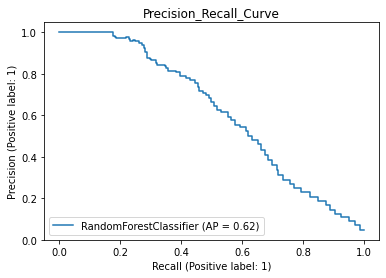

In [27]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(rf_clf, X_test, y_test)
disp.ax_.set_title('Precision_Recall_Curve')

In [28]:
from sklearn.metrics import precision_score

precision_score(y_test, y_hat_rf_test, average = None)

array([0.96730168, 0.8515625 ])

In [29]:
from sklearn.metrics import recall_score
recall_score(y_test, y_hat_rf_test, average = None)

array([0.9972153 , 0.32153392])

In [30]:
rf_clf_2 = RandomForestClassifier(n_estimators = 50, max_depth = 10, min_samples_split = 100, random_state = 2)
rf_clf_2.fit(X_train, y_train)

rf_clf_2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [31]:
y_hat_rf_train_2 = rf_clf_2.predict(X_train)
accuracy_score(y_hat_rf_train_2, y_train)

0.9617963618857673

In [32]:
confusion_matrix(y_train, y_hat_rf_train_2)

array([[27668,     0],
       [ 1111,   302]])

In [33]:
y_hat_rf_test_2 = rf_clf_2.predict(X_test)
accuracy_score(y_hat_rf_test_2, y_test)

0.9597179558782463

In [34]:
confusion_matrix(y_test, y_hat_rf_test_2)

array([[13646,     0],
       [  577,   101]])

In [35]:
precision_score(y_test, y_hat_rf_test_2, average = None)

array([0.95943191, 1.        ])

In [36]:
recall_score(y_test, y_hat_rf_test_2, average = None)

array([1.        , 0.14896755])

In [37]:
y_fake = ['0'] * len(y_hat_rf_test_2)
accuracy_score(y_fake, y_test)

0.9526668528344038

In [38]:
recall_score(y_test, y_fake, average = None, zero_division = 0)

array([1., 0.])

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, 
                                 max_depth = 1, random_state=0).fit(X_train, y_train)

clf.score(X_test, y_test)


0.9602764590896398

In [40]:
clf.score(X_train, y_train)

0.9622090024414566

In [41]:
clf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 1.67338563e-03, 2.53690109e-03,
       1.84813939e-02, 0.00000000e+00, 0.00000000e+00, 5.48567290e-04,
       1.24581463e-03, 7.01375323e-04, 6.93740372e-03, 6.35773516e-04,
       9.87317964e-03, 0.00000000e+00, 0.00000000e+00, 2.25372670e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.20704396e-04,
       1.47121044e-02, 5.87555681e-03, 0.00000000e+00, 6.69417046e-03,
       1.90018371e-03, 7.13583565e-03, 6.36298470e-01, 1.32787581e-03,
       9.73916005e-03, 0.00000000e+00, 0.00000000e+00, 1.56523587e-03,
       0.00000000e+00, 8.94771705e-04, 1.65732164e-01, 0.00000000e+00,
       1.78212533e-03, 3.32848989e-03, 5.20941980e-03, 0.00000000e+00,
       6.90379506e-03, 1.55670974e-02, 8.42188537e-04, 9.61450147e-04,
       0.00000000e+00, 4.42407150e-02, 5.33686055e-04, 2.47200638e-03,
       0.00000000e+00, 0.00000000e+00, 1.23513960e-03, 1.30895098e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.71498314e-03,
      

In [39]:
full_df.to_csv('complete_dataset.csv', index=False)